# Telling Stories With Data


**Version 0.1**

***
By Kalina Borkiewicz
8 Jan 2021

Find a dataset of your choice. This can be one you have visualized before, one you found online, or the sample data provided. Information is provided below for the sample data, but **you are encouraged to use your own data**. You are not required to complete the assignment in this Jupyter notebook, but can use any tool you are comfortable with.

Use the lessons from the lecture to complete the assignment below.

## Sample Dataset (skip if using your own data)

Download the [`hipgalv.LSR.csv`](https://northwestern.box.com/s/ykmt0tf4hdjbx61o6f83kv5qsyex91yb) file which includes the Hipparcos star catalog, processed and described below by Stuart Levy. The star positions/velocities are given in Galactic coordinates relative to the Sun. 

What the fields mean:

* x, y, z  -- star position, in parsecs.  Sun = 0,0,0.   z is approximately the altitude above/below the Galactic plane
* colorb_v and colorv_i -- two measures of color, "B-V" (blue vs yellow) and "V-I" (yellow vs near-infrared). More positive => more red. A white star has values near zero, a yellow sunlike star around 0.5, a very red star 1.5 or more.
* Mv -- estimated intrinsic luminosity in magnitude (logarithmic) units.   (Note that Mv is different from lower-case mv.)
* vx, vy, vz -- velocity.  vz is the vertical (above/below Galactic plane) velocity. 
* speed -- magnitude of |vx, vy, vz| vector

Things that might be neat to study:
* Is the altitude above/below the plane related to the star's color?
* What's the distribution of color vs Mv intrinsic luminosity? 
* A fairly-dim star might have Mv of +3 or +5 or so (the sun is about +5); a fairly bright star might have Mv around 0; a superluminous one, Mv ~ -5.
* Do the B-V and V-I colors change their distribution for nearby stars vs more-distant ones?  (more positive => more red) (They might adopt "nearby" as closer than 200 parsecs, say.)
* Is the distribution of velocities in the xy plane different for nearby stars than for more-distant stars?
* Are there noticeable clumps in the distribution of velocities in the xy plane?   (Can you detect star clusters from their space velocities?)
* Stars' orbits send them oscillating above and below the Galactic plane.    We're catching them at arbitrary places in their orbits, but can use a combination of z and vz to estimate how high/low they'll go.   This isn't an accurate formula, but each star's peak altitude might be something like 1.4*(vz^2) + abs(z), so that the Sun (with vz of about 7 km/sec) will have a peak altitude of about 80 parsecs.
* Given that, is there a relation between star color and that derived peak altitude?   (I'd expect that there'll be lower peak altitudes for bluer stars, higher ones for redder stars.)

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm

%matplotlib notebook

Here is a code sample showing how to read the data and draw a colored plot.

<IPython.core.display.Javascript object>


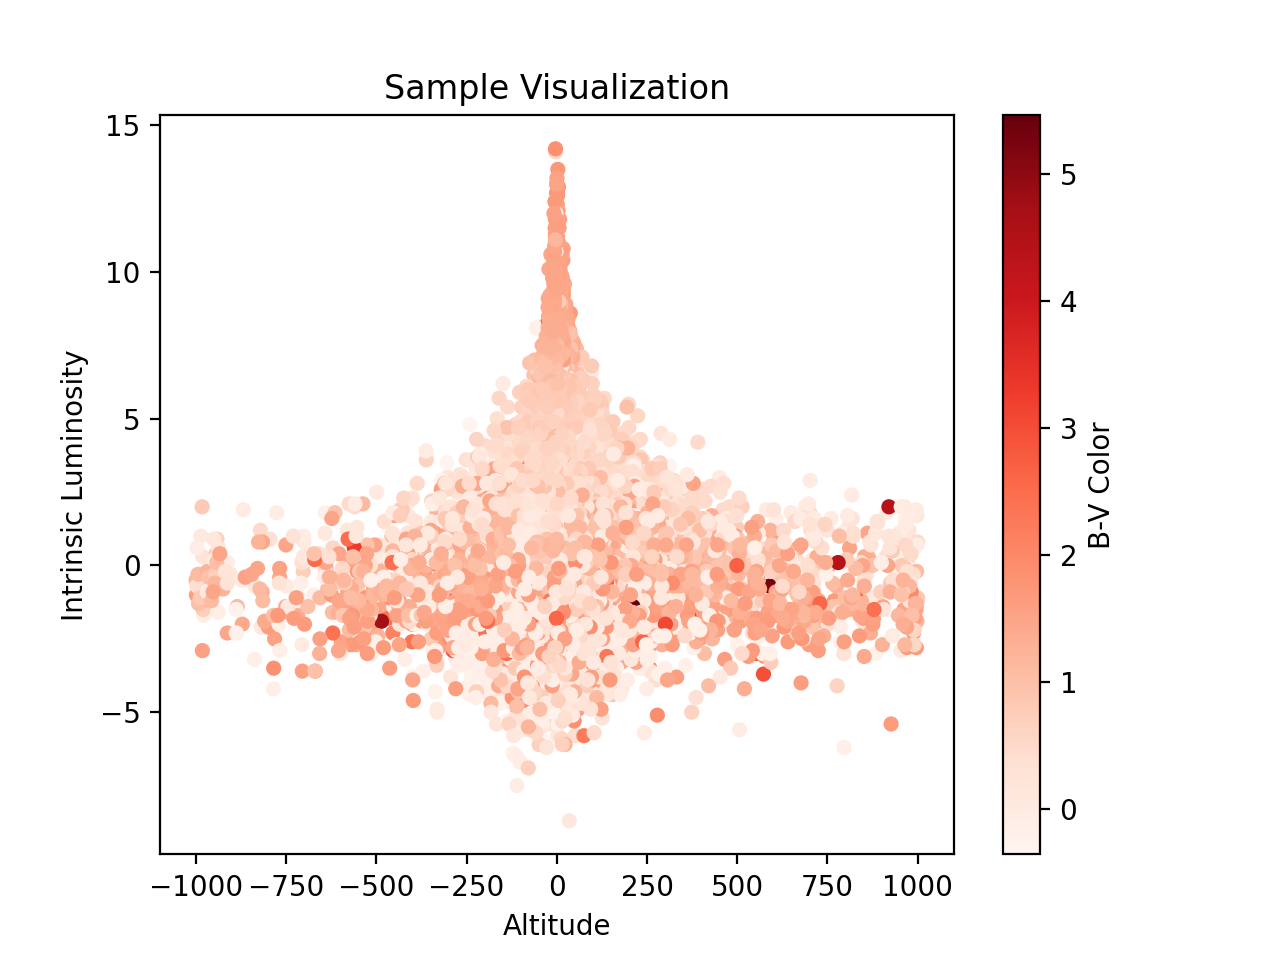

Text(0, 0.5, 'B-V Color')

In [3]:
# Load the csv with pandas
df = pd.read_csv('hipgalv.LSR.csv', index_col=0)
#print(df)

# Use matplotlib's default "Reds" colormap. More colormaps and information here:
# https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html
cmap = cm.get_cmap('Reds') 

# Make the plot
ax = df.plot.scatter(x='z',
                     y='Mv',
                     c='colorb_v',
                     cmap=cmap,
                     title="Sample Visualization")

# Set the x-axis label
ax.set_xlabel("Altitude")

# Set the y-axis label
ax.set_ylabel("Intrinsic Luminosity")

# Set the colormap label
f = plt.gcf()
cax = f.get_axes()[1]
cax.set_ylabel('B-V Color')


<img style="display: block; margin-left: auto; margin-right: auto" src="images/Fig5.png" width="500" align="middle">

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator, FixedLocator
from matplotlib.gridspec import GridSpec
import glob

from dust_extinction.dust import extinction_cal

In [7]:
%matplotlib notebook

In [8]:
abs_mag_df = pd.read_csv('/Users/adamamiller/astronomy/ZTF/SN19yvq/plots/abs_mag_p48.csv')
t_fl = -17.4928

In [9]:
abs_g_df = pd.read_csv('/Users/adamamiller/Desktop/abs_g.csv')
abs_r_df = pd.read_csv('/Users/adamamiller/Desktop/abs_r.csv')

In [10]:
color_dict = {1: 'MediumAquaMarine',
              2: 'Crimson', 
              3: 'Goldenrod', 
              "uvw2": "#D71DE5",
              "uvm2": "#008DCB",
              "uvw1": "#A4A4E3"}

mark_color_dict = {2: 'white',
                   1: 'MediumAquaMarine',
                   3: 'Goldenrod'}
sym_dict = {1: 'o',
            2: 'o',
            3: 'X'}
mec_dict = {2: 'Crimson',
            1: '0.5',
            3: '0.5'}
mew_dict = {2: 2,
            1: 0.5,
            3: 0.5}
filt_dict = {1:r'$g_\mathrm{ZTF}$', 
             2:r'$r_\mathrm{ZTF}$', 
             3:r'$i_\mathrm{ZTF}$'}
zorder_dict = {3: 10,
               1: 5,
               2: 2}

<IPython.core.display.Javascript object>


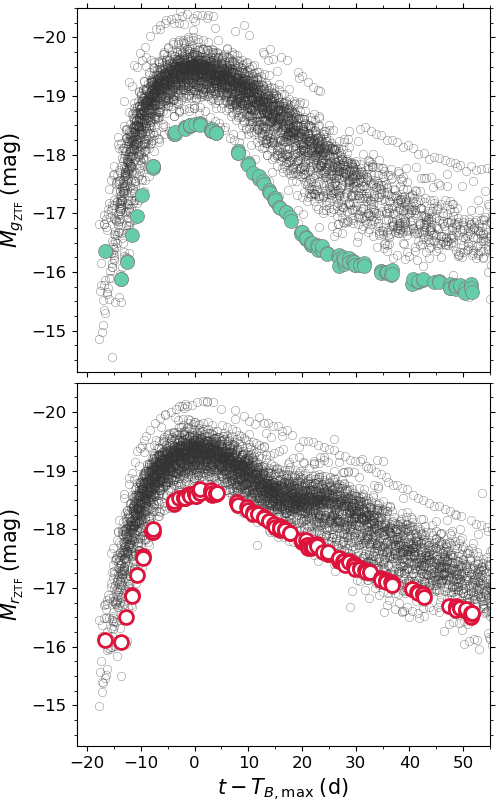

0 SNe are in this figure


In [16]:
time_g = np.array([])
mag_g = np.array([])
time_r = np.array([])
mag_r = np.array([])

fig, (axg, axr) = plt.subplots(2, 1, figsize=(5,8))

n_sn = 0

# for lcf in ztf18_sne_files:
#     ztf_name = lcf.split('/')[-1].split('.')[0]
#     this_sn = np.where(salt_df.name == ztf_name)
#     if ( #(salt_df['z_source'].iloc[this_sn].values[0] == 'Msl') or 
#         (salt_df['Ia subtype'].iloc[this_sn].values[0] in ['SC', 'SC*', 'Ia-CSM'])
#        ):
#         continue
    
#     ebv_host = ebv_snoopy.iloc[np.where(ebv_snoopy.sn == ztf_name)].ebv.values[0]
#     if ebv_host > 0:
#         a_g = extinction_cal.calALambda(4722.74, 3.1, ebv_host)
#         a_r = extinction_cal.calALambda(6339.61, 3.1, ebv_host)
#     else:
#         a_g = 0
#         a_r = 0
    
#     lc_df = pd.read_csv(lcf, delim_whitespace=True)
    
#     g_obs = np.where((lc_df.fid == 1) & (lc_df.mag_unc < 0.2))
#     r_obs = np.where((lc_df.fid == 2) & (lc_df.mag_unc < 0.2))
#     t_offset = ((salt_df.t0_B_salt2.values - 
#                  salt_df.t0_g_adopted.values)/
#                 (1 + salt_df.z_adopt.values))[this_sn]

    
#     # K corrections
#     gKcorr = pd.read_csv('../data/comp_sne/ztf_ia_2018/{}_gKcorr.ascii'.format(ztf_name), 
#                      delim_whitespace=True, names=['MJD', 'kmag'])
#     rKcorr = pd.read_csv('../data/comp_sne/ztf_ia_2018/{}_rKcorr.ascii'.format(ztf_name), 
#                          delim_whitespace=True, names=['MJD', 'kmag'])
#     mjd_obs = (lc_df.t.values)*(1+salt_df.z_adopt.iloc[this_sn].values) + salt_df.t0_g_adopted.iloc[this_sn].values - 2400000.5
    
#     sn_gkcorr = np.zeros_like(lc_df.iloc[g_obs].t.values)
#     sn_rkcorr = np.zeros_like(lc_df.iloc[r_obs].t.values)

#     for obs_num, mjd in enumerate(mjd_obs[g_obs]):
#         if np.min(np.abs(mjd - gKcorr.MJD.values)) < 0.4:
#             sn_gkcorr[obs_num] = gKcorr.kmag.values[np.argmin(np.abs(mjd - gKcorr.MJD.values))]

#     for obs_num, mjd in enumerate(mjd_obs[r_obs]):
#         if np.min(np.abs(mjd - rKcorr.MJD.values)) < 0.4:
#             sn_rkcorr[obs_num] = rKcorr.kmag.values[np.argmin(np.abs(mjd - rKcorr.MJD.values))]
    
#     has_g_Kcorr = np.where(sn_gkcorr != 0)
#     axg.plot(lc_df.iloc[g_obs].t.values[has_g_Kcorr] - t_offset, 
#              lc_df.iloc[g_obs].mag.values[has_g_Kcorr] - a_g - sn_gkcorr[has_g_Kcorr],
#              'o', color='None', mec='0.2', mew=0.3,  alpha=0.7)
#     time_g = np.append(time_g, lc_df.iloc[g_obs].t.values[has_g_Kcorr] - t_offset)
#     mag_g = np.append(mag_g,lc_df.iloc[g_obs].mag.values[has_g_Kcorr] - a_g - sn_gkcorr[has_g_Kcorr])
#     if min(lc_df.iloc[g_obs].mag.values - a_g - sn_gkcorr) < -20.3:
#         print(ztf_name)
#     has_r_Kcorr = np.where(sn_rkcorr != 0)
#     axr.plot(lc_df.iloc[r_obs].t.values[has_r_Kcorr] - t_offset, 
#              lc_df.iloc[r_obs].mag.values[has_r_Kcorr] - a_r - sn_rkcorr[has_r_Kcorr],
#              'o', color='None', mec='0.2', mew=0.3,  alpha=0.7)
#     time_r = np.append(time_r, lc_df.iloc[r_obs].t.values[has_r_Kcorr] - t_offset)
#     mag_r = np.append(mag_r, lc_df.iloc[r_obs].mag.values[has_r_Kcorr] - a_r - sn_rkcorr[has_r_Kcorr])
    
# #     if ztf_name == 'ZTF18aapqwyv': #'ZTF18abeegsl':
# #         axg.plot(lc_df.iloc[g_obs].t.values[has_g_Kcorr], 
# #                  lc_df.iloc[g_obs].mag.values[has_g_Kcorr] - a_g - sn_gkcorr[has_g_Kcorr],
# #                  '*', color='DarkOrange', mec='0.2', mew=0.3,  alpha=0.7, ms=10, zorder=100)
# #         axr.plot(lc_df.iloc[r_obs].t.values[has_r_Kcorr], 
# #                  lc_df.iloc[r_obs].mag.values[has_r_Kcorr] - a_r - sn_rkcorr[has_r_Kcorr],
# #                  '*', color='DarkOrange', mec='0.2', mew=0.3,  alpha=0.7, ms=10, zorder=100)        
#     n_sn += 1

axg.plot(abs_g_df.time.values, 
         abs_g_df.mag.values,
         'o', color='None', mec='0.2', mew=0.3,  alpha=0.7)
axr.plot(abs_r_df.time.values, 
         abs_r_df.mag.values,
         'o', color='None', mec='0.2', mew=0.3,  alpha=0.7)

g_obs = np.where(abs_mag_df.filt == 'g')
axg.plot(abs_mag_df.t_restframe.iloc[g_obs].values + t_fl, 
         abs_mag_df.abs_mag.iloc[g_obs].values, 
         sym_dict[1], color=mark_color_dict[1],
         mec=mec_dict[1], mew=mew_dict[1],
         zorder = zorder_dict[1], ms=10)
r_obs = np.where(abs_mag_df.filt == 'r')
axr.plot(abs_mag_df.t_restframe.iloc[r_obs].values + t_fl, 
         abs_mag_df.abs_mag.iloc[r_obs].values, 
         sym_dict[2], color=mark_color_dict[2], 
         mec=mec_dict[2], mew=mew_dict[2],
         zorder = zorder_dict[2], ms=10)

for ax in [axg, axr]:
    ax.set_xlim(-22, 55)
    ax.set_ylim(-14.3, -20.5)
    ax.xaxis.set_minor_locator(MultipleLocator(5))
    ax.yaxis.set_minor_locator(MultipleLocator(0.25))
    
axg.tick_params(which='both', top=True, right=True, labelsize=12)
axr.tick_params(which='both', right=True, labelsize=12)
axg.set_xticklabels([])
axg.set_ylabel(r'$M_{g_\mathrm{ZTF}} \;(\mathrm{mag})$', fontsize=15)
axr.set_ylabel(r'$M_{r_\mathrm{ZTF}} \;(\mathrm{mag})$', fontsize=15)
axr.set_xlabel(r"$t - T_{B,\mathrm{max}} \; (\mathrm{d})$", fontsize=15)

fig.subplots_adjust(top=0.99, right=0.98, left=0.153, bottom=0.067, hspace=0.03)


## Problem 1) Tell different stories to different audiences

Create at least two different visualizations from your dataset to answer the following prompts. Vary the labels/captions/title if you use the same visualization for a different prompt.

Note: You do not need to complete this entire problem in this Jupyter notebook. If you would like to add annotations, make a flow chart, show an overview + detail, or anything more complex than a basic chart, feel free to start your visualization here (or elsewhere), and complete it in PowerPoint, PhotoShop, Paint, GIMP, or whatever tool you are comfortable working with. 

**Prompt #1: Tell a story to your peers in astronomy.**

<IPython.core.display.Javascript object>


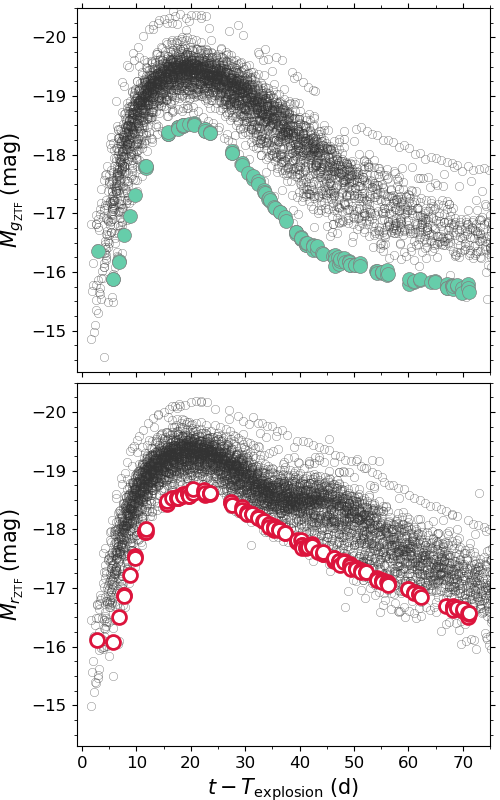

In [19]:
fig, (axg, axr) = plt.subplots(2, 1, figsize=(5,8))

n_sn = 0

axg.plot(abs_g_df.time.values + 19.5, 
         abs_g_df.mag.values,
         'o', color='None', mec='0.2', mew=0.3,  alpha=0.7)
axr.plot(abs_r_df.time.values  + 19.5, 
         abs_r_df.mag.values,
         'o', color='None', mec='0.2', mew=0.3,  alpha=0.7)

g_obs = np.where(abs_mag_df.filt == 'g')
axg.plot(abs_mag_df.t_restframe.iloc[g_obs].values + t_fl  + 19.5, 
         abs_mag_df.abs_mag.iloc[g_obs].values, 
         sym_dict[1], color=mark_color_dict[1],
         mec=mec_dict[1], mew=mew_dict[1],
         zorder = zorder_dict[1], ms=10)
r_obs = np.where(abs_mag_df.filt == 'r')
axr.plot(abs_mag_df.t_restframe.iloc[r_obs].values + t_fl  + 19.5, 
         abs_mag_df.abs_mag.iloc[r_obs].values, 
         sym_dict[2], color=mark_color_dict[2], 
         mec=mec_dict[2], mew=mew_dict[2],
         zorder = zorder_dict[2], ms=10)

for ax in [axg, axr]:
    ax.set_xlim(-1, 75)
    ax.set_ylim(-14.3, -20.5)
    ax.xaxis.set_minor_locator(MultipleLocator(5))
    ax.yaxis.set_minor_locator(MultipleLocator(0.25))
    
axg.tick_params(which='both', top=True, right=True, labelsize=12)
axr.tick_params(which='both', right=True, labelsize=12)
axg.set_xticklabels([])
axg.set_ylabel(r'$M_{g_\mathrm{ZTF}} \;(\mathrm{mag})$', fontsize=15)
axr.set_ylabel(r'$M_{r_\mathrm{ZTF}} \;(\mathrm{mag})$', fontsize=15)
axr.set_xlabel(r"$t - T_{\mathrm{explosion}} \; (\mathrm{d})$", fontsize=15)

fig.subplots_adjust(top=0.99, right=0.98, left=0.153, bottom=0.067, hspace=0.03)


<!-- Photometric evolution of SN 2019yvq compared to 121 normal SNe Ia observed by ZTF (Yao et al. 2019) in the gZTF (top) and rZTF(bottom) filters. The normal SNe are shown as open gray circles, while the symbols for SN 2019yvq are the same as Figure 1. Relative to normal SNe Ia, SN 2019yvq is fainter, declines faster in gZTF, and lacks the “shoulder” typically seen in the rZTF filter. Normal SNe light curves have been corrected for host-galaxy reddening and K-corrections have been applied, with both determined via SNooPY (see Bulla et al. 2020 for details of our implementation). K- corrections have not been applied to the light curve of SN 2019yvq.
 -->

Relative to normal SNe Ia, SN 2019yvq is fainter, declines faster in gZTF, and lacks the secondary maximum typically seen in the rZTF filter.

Photometric evolution of SN 2019yvq compared to 121 normal SNe Ia observed by ZTF (Yao et al. 2019) in the gZTF (top) and rZTF (bottom) filters. The normal SNe are shown as open gray circles, while the symbols for SN 2019yvq are the same as Figure 1.  Normal SNe light curves have been corrected for host-galaxy reddening and K-corrections have been applied, with both determined via SNooPY (see Bulla et al. 2020 for details of our implementation). K- corrections have not been applied to the light curve of SN 2019yvq.

**Prompt #2: Tell a story to a fifth grader.**

In [52]:
from matplotlib import patheffects

<IPython.core.display.Javascript object>


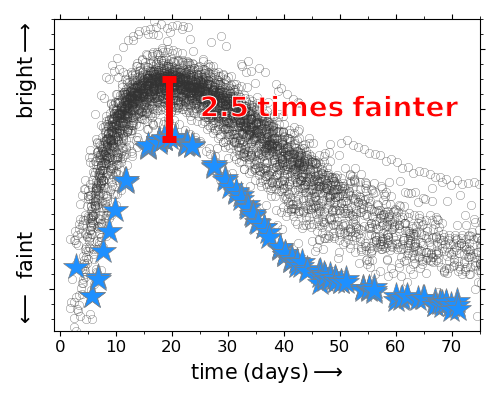

In [56]:
fig, axg = plt.subplots(1, 1, figsize=(5,4))

n_sn = 0

axg.plot(abs_g_df.time.values + 19.5, 
         abs_g_df.mag.values,
         'o', color='None', mec='0.2', mew=0.3,  alpha=0.7)
# axr.plot(abs_r_df.time.values  + 19.5, 
#          abs_r_df.mag.values,
#          'o', color='None', mec='0.2', mew=0.3,  alpha=0.7)

g_obs = np.where(abs_mag_df.filt == 'g')
axg.plot(abs_mag_df.t_restframe.iloc[g_obs].values + t_fl  + 19.5, 
         abs_mag_df.abs_mag.iloc[g_obs].values, 
         '*', color='DodgerBlue',
         mec=mec_dict[1], mew=mew_dict[1],
         zorder = zorder_dict[1], ms=20)
# r_obs = np.where(abs_mag_df.filt == 'r')
# axr.plot(abs_mag_df.t_restframe.iloc[r_obs].values + t_fl  + 19.5, 
#          abs_mag_df.abs_mag.iloc[r_obs].values, 
#          sym_dict[2], color=mark_color_dict[2], 
#          mec=mec_dict[2], mew=mew_dict[2],
#          zorder = zorder_dict[2], ms=10)


axg.errorbar([19.5], [-19], [0.5],
             fmt=',', lw=5, color='red', zorder=100,
             capsize=5, capthick=5)
text = axg.text(25, -19, r'$\mathbf{2.5 \; times \; fainter}$', 
         color='red', fontsize=20, va='center')

text.set_path_effects([patheffects.Stroke(linewidth=0.7, foreground='white')])

# for ax in [axg, axr]:
axg.set_xlim(-1, 75)
axg.set_ylim(-15.3, -20.5)
axg.xaxis.set_minor_locator(MultipleLocator(5))
axg.yaxis.set_minor_locator(MultipleLocator(0.25))
    
axg.tick_params(which='both', top=True, right=True, labelsize=12)
# axr.tick_params(which='both', right=True, labelsize=12)
# axg.set_xticklabels([])
axg.set_yticklabels([])
# axr.set_yticklabels([])
axg.set_ylabel(r'$\longleftarrow \;\; \mathrm{faint} \;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\; \mathrm{bright} \longrightarrow$', fontsize=15)
# axr.set_ylabel(r'$\longleftarrow \;\; \mathrm{faint} \;\;\;\;\;\;\;\;\;\;\;\;\;\;\; \mathrm{bright} \longrightarrow$', fontsize=15)
axg.set_xlabel(r"$\mathrm{time} \; (\mathrm{days}) \longrightarrow$", fontsize=15)

# fig.subplots_adjust(top=0.99, right=0.98, left=0.153, bottom=0.067, hspace=0.03)
fig.tight_layout()

The Zwicky Transient Facility recently discovered an unusually faint explosion from a white dwarf star. The new explosion, named supernova 2019yvq, is approximately two and a half times fainter than a normal white dwarf explosion. Normal explosions are shown with open circles, supernova 2019yvq is shown via stars. 

**Prompt #3: Tell a story using the ten hundred most common words in the English language** (use this tool: https://xkcd.com/simplewriter/ )

Note: This should only require a change in title/caption/labels, not in the visualization itself.

<IPython.core.display.Javascript object>


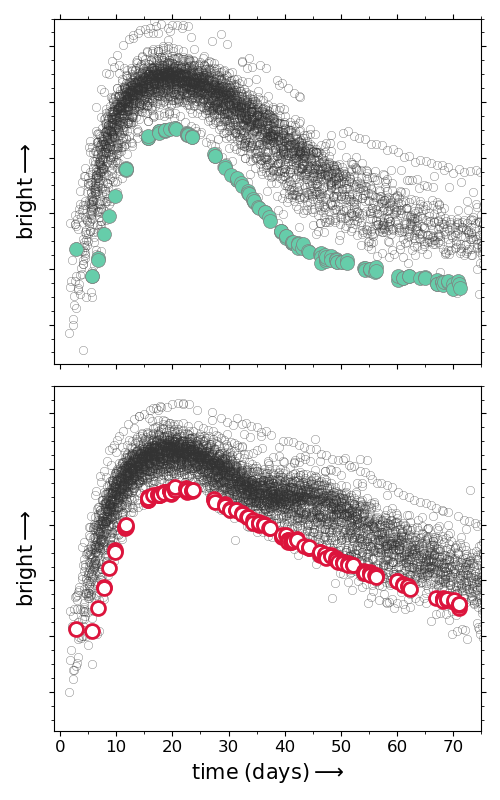

In [63]:
fig, (axg, axr) = plt.subplots(2, 1, figsize=(5,8))

n_sn = 0

axg.plot(abs_g_df.time.values + 19.5, 
         abs_g_df.mag.values,
         'o', color='None', mec='0.2', mew=0.3,  alpha=0.7)
axr.plot(abs_r_df.time.values  + 19.5, 
         abs_r_df.mag.values,
         'o', color='None', mec='0.2', mew=0.3,  alpha=0.7)

g_obs = np.where(abs_mag_df.filt == 'g')
axg.plot(abs_mag_df.t_restframe.iloc[g_obs].values + t_fl  + 19.5, 
         abs_mag_df.abs_mag.iloc[g_obs].values, 
         sym_dict[1], color=mark_color_dict[1],
         mec=mec_dict[1], mew=mew_dict[1],
         zorder = zorder_dict[1], ms=10)
r_obs = np.where(abs_mag_df.filt == 'r')
axr.plot(abs_mag_df.t_restframe.iloc[r_obs].values + t_fl  + 19.5, 
         abs_mag_df.abs_mag.iloc[r_obs].values, 
         sym_dict[2], color=mark_color_dict[2], 
         mec=mec_dict[2], mew=mew_dict[2],
         zorder = zorder_dict[2], ms=10)

for ax in [axg, axr]:
    ax.set_xlim(-1, 75)
    ax.set_ylim(-14.3, -20.5)
    ax.xaxis.set_minor_locator(MultipleLocator(5))
    ax.yaxis.set_minor_locator(MultipleLocator(0.25))
    
axg.tick_params(which='both', top=True, right=True, labelsize=12)
axr.tick_params(which='both', right=True, labelsize=12)
axg.set_xticklabels([])
axg.set_yticklabels([])
axr.set_yticklabels([])

axg.set_ylabel(r'$\mathrm{bright} \longrightarrow$', fontsize=15)
axr.set_ylabel(r'$\mathrm{bright} \longrightarrow$', fontsize=15)

axr.set_xlabel(r"$\mathrm{time} \; (\mathrm{days}) \longrightarrow$", fontsize=15)

fig.tight_layout()

A new dying, hot-white star is not bright, fades faster in green light, and fades along a straight line in red light, all of which are different from normal dying, how-white stars.

**Prompt #4: Tell a story to a government policymaker who is considering cutting funding for your field.**

## Problem 2) Miscommunication

Choose one of the following two assignments to complete. If you are feeling ambitious, complete both as an optional **Challenge Problem**.

**Prompt Option A: Tell a false, but believable, story with your data**

<IPython.core.display.Javascript object>


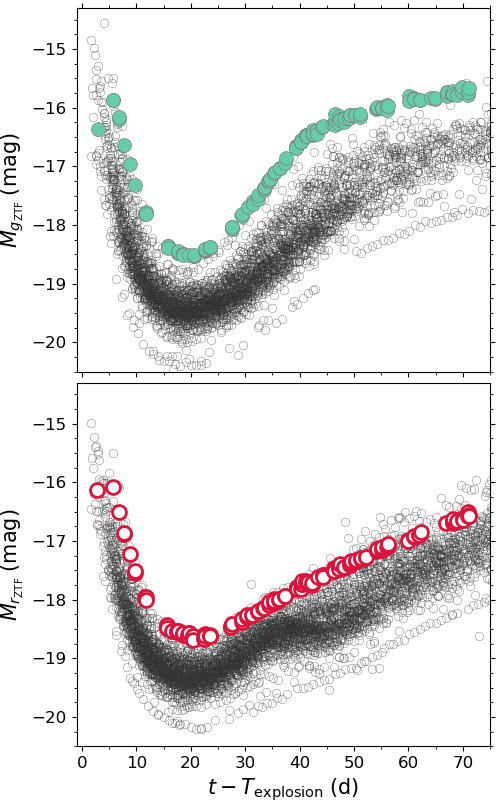

In [67]:
fig, (axg, axr) = plt.subplots(2, 1, figsize=(5,8))

n_sn = 0

axg.plot(abs_g_df.time.values + 19.5, 
         abs_g_df.mag.values,
         'o', color='None', mec='0.2', mew=0.3,  alpha=0.7)
axr.plot(abs_r_df.time.values  + 19.5, 
         abs_r_df.mag.values,
         'o', color='None', mec='0.2', mew=0.3,  alpha=0.7)

g_obs = np.where(abs_mag_df.filt == 'g')
axg.plot(abs_mag_df.t_restframe.iloc[g_obs].values + t_fl  + 19.5, 
         abs_mag_df.abs_mag.iloc[g_obs].values, 
         sym_dict[1], color=mark_color_dict[1],
         mec=mec_dict[1], mew=mew_dict[1],
         zorder = zorder_dict[1], ms=10)
r_obs = np.where(abs_mag_df.filt == 'r')
axr.plot(abs_mag_df.t_restframe.iloc[r_obs].values + t_fl  + 19.5, 
         abs_mag_df.abs_mag.iloc[r_obs].values, 
         sym_dict[2], color=mark_color_dict[2], 
         mec=mec_dict[2], mew=mew_dict[2],
         zorder = zorder_dict[2], ms=10)

for ax in [axg, axr]:
    ax.set_xlim(-1, 75)
    ax.set_ylim(-20.5, -14.3)
    ax.xaxis.set_minor_locator(MultipleLocator(5))
    ax.yaxis.set_minor_locator(MultipleLocator(0.25))
    
axg.tick_params(which='both', top=True, right=True, labelsize=12)
axr.tick_params(which='both', right=True, labelsize=12)
axg.set_xticklabels([])
axg.set_ylabel(r'$M_{g_\mathrm{ZTF}} \;(\mathrm{mag})$', fontsize=15)
axr.set_ylabel(r'$M_{r_\mathrm{ZTF}} \;(\mathrm{mag})$', fontsize=15)
axr.set_xlabel(r"$t - T_{\mathrm{explosion}} \; (\mathrm{d})$", fontsize=15)

fig.subplots_adjust(top=0.99, right=0.98, left=0.153, bottom=0.067, hspace=0.03)


**Prompt Option B: Review the visualizations you created in Problem 1. How could they be misinterpreted?** Use the space below to write your answer in "markdown" mode.

## Problem 3) Audience Testing

Show one or two of your visualizations to your friends, peers, family members, or other groups of your choice. Did they understand your story? Did they care? How would you change your visualization(s) based on this feedback? Use the space below to write your answer in "markdown" mode.

## Challenge Problem (Optional)

Using what you learned in Problem 2 and Problem 3, revise your visualization(s).